In [1]:
print "hello"

hello


In [2]:
import os
from netCDF4 import Dataset
import numpy as np
from osgeo import gdal
from osgeo import osr
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
grid = 'e2n_3'
#file = '/projects/PMESDR/vagrant/brodzik/' + grid + '/FD4a-E2T97-061-061.lis_dump.nc'
#file = '/projects/PMESDR/vagrant/brodzik/' + grid + '/FD4m-E2N97-061-061.lis_dump.nc'
#file = '/projects/PMESDR/vagrant/brodzik/bgiRSS/' + grid + '/FD4a-E2T97-061-061.lis_dump1.nc'
file = '/projects/PMESDR/vagrant/janus_fullday/sirRSS_3km/FD1e-E2N97-061-061.lis_dump.nc'
f = Dataset( file, 'r', 'NETCDF4' )

In [12]:
print f

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format UNDEFINED):
    nsx: 5760
    nsy: 5760
    iopt: 8
    ascale: 3.0
    bscale: 0.0
    a0: 0.0
    b0: 0.0
    xdeg: 2880.0
    ydeg: 2880.0
    isday: 61
    ieday: 61
    ismin: 0
    iemin: 1440
    iyear: 1997
    iregion: 308
    ipol: 0
    nsx2: 720
    nsy2: 720
    non_size_x: 8
    non_size_y: 8
    a02: 0.0
    ascale2: 1.0
    bscale2: 0.0
    b02: 0.0
    xdeg2: 2880.0
    ydeg2: 2880.0
    a_init: 200.0
    ibeam: 1
    nits: 25
    median_flag: 0
    Nout: 16
    Region_name: EASE2-N
    Sensor_name: 13
    Creator: BYU MERS:meas_meta_sir v1.200000
    Creation_time: 14:59:05 05/22/15
    a_name: FD1e-a-E2N97-061-061.sir
    c_name: FD1e-C-E2N97-061-061.sir
    e_name: FD1e-E-E2N97-061-061.sir
    i_name: FD1e-I-E2N97-061-061.sir
    j_name: FD1e-J-E2N97-061-061.sir
    v_name: FD1e-V-E2N97-061-061.sir
    p_name: FD1e-p-E2N97-061-061.sir
    a_name_ave: FD1e-a-E2N97-061-061.ave
    no

In [13]:
# This should not be necessary, if the data are in the netCDF file properly
# Needs some investigation, could be FORTRAN-C-netCDF nonsense
tb = f.variables[ 'grd_a_image' ][ : ]
cols, rows = np.shape( tb )
print cols, rows
tb = tb.reshape( rows, cols )

720 720


In [10]:
f.close()


<matplotlib.colorbar.Colorbar instance at 0x7f46bfe02d40>

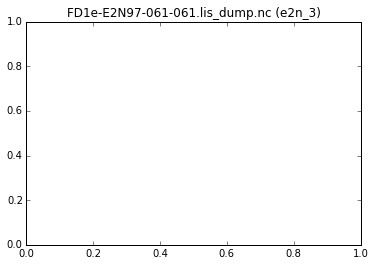

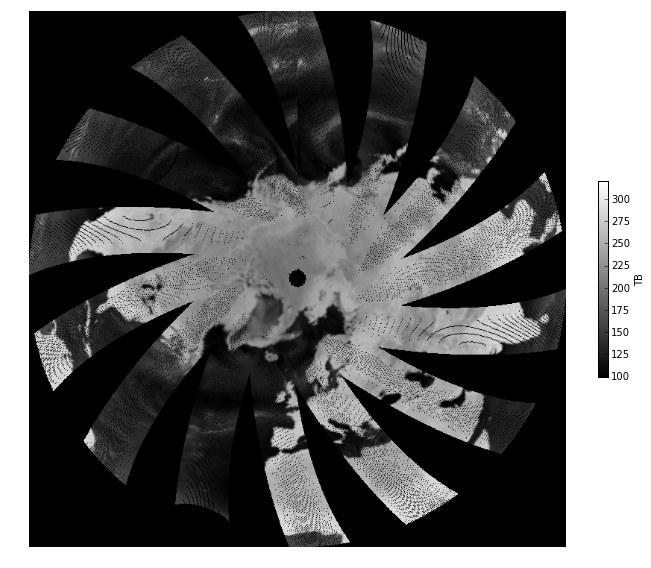

In [16]:
fig, ax = plt.subplots(1,1)
plt.figure(figsize=(12,10))
ax.set_title( os.path.basename( file ) + ' (' + grid + ')' )
# Flip the image to display properly in python
plt.imshow(np.flipud(tb), cmap=plt.cm.gray, vmin=100, vmax=320 )
plt.axis('off')
plt.colorbar( shrink=0.35, label='TB' )
#plt.colorbar( shrink=0.95, label='TB' )

In [ ]:
outfile = file + '.tif'
driver = gdal.GetDriverByName("GTiff")

In [ ]:
dst_ds = driver.Create(outfile, cols, rows, 1, gdal.GDT_UInt16)

In [ ]:
proj = osr.SpatialReference()
# ease2_t:
# when we can connect to epsg v8.6, we should be able to do this: proj.SetWellKnownGeogCS("EPSG:6933")
proj.SetFromUserInput("+proj=cea +lat_0=0 +lon_0=0 +lat_ts=30 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m")
# E2N
#proj.SetFromUserInput("+proj=laea +lat_0=90 +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m")
# E2S
#proj.SetFromUserInput("+proj=laea +lat_0=-90 +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m")
dst_ds.SetProjection(proj.ExportToWkt())

In [ ]:
print proj.ExportToPrettyWkt()

In [ ]:
# Thanks to web page at:
# http://geoexamples.blogspot.com/2012/01/creating-files-in-ogr-and-gdal-with.html
# The geotransform defines the relation between the raster coordinates x, y and the 
# geographic coordinates, using the following definition:
# Xgeo = geotransform[0] + Xpixel*geotransform[1] + Yline*geotransform[2]
# Ygeo = geotransform[3] + Xpixel*geotransform[4] + Yline*geotransform[5]
# The first and fourth parameters define the origin of the upper left pixel 
# The second and sixth parameters define the pixels size. 
# The third and fifth parameters define the rotation of the raster.
# These values are for EASE2_T25km only, values are meters
#E2T_25
scale = 25025.26000
#E2T_3
#scale = 3128.15750
#E2N_25 or E2S_25
#scale = 25000.00000
#E2N_3 or E2S_3
#scale = 3125.00000
# E2T
map_UL_x = -17367530.44
map_UL_y = -6756820.20000
# E2N or E2S
#map_UL_x = -9000000.
#map_UL_y = -9000000.
geotransform = (map_UL_x,scale,0.,map_UL_y,0.,scale)
dst_ds.SetGeoTransform(geotransform)

In [ ]:
# Convert tb array to UInt16
print tb.dtype
new = (tb + 0.5).astype(uint16)

In [ ]:
dst_ds.GetRasterBand(1).WriteArray(new)

In [ ]:
dst_ds = None

In [ ]:
print outfile


In [ ]:
print "Hello world"

